In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ydata_profiling as pf

pd.set_option("display.float_format", "{:.2f}".format)

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


# **Loading Data**

In [2]:
df=pd.read_csv('/kaggle/input/salary-data/Salary_Data.csv')

# **Understand the Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [4]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [5]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.00,Male,Bachelor's,Software Engineer,5.00,90000.00
1,28.00,Female,Master's,Data Analyst,3.00,65000.00
2,45.00,Male,PhD,Senior Manager,15.00,150000.00
3,36.00,Female,Bachelor's,Sales Associate,7.00,60000.00
4,52.00,Male,Master's,Director,20.00,200000.00


In [6]:
df.shape

(6704, 6)

In [7]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

# **Data Cleaning**

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [10]:
df.shape

(6698, 6)

In [11]:
df.shape

(6698, 6)

In [12]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [13]:
df['Education Level'] = df['Education Level'].replace({"Bachelor's Degree": "Bachelor's",
                                                      "Master's Degree": "Master's",
                                                      "phD": "PhD" })

In [14]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [15]:
#The vast majority of the data is duplicated, so I prefer to remove 
# the duplicate data to obtain more accurate results.

df=df.drop_duplicates()

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1786.00,35.14,8.21,21.00,29.00,33.00,41.00,62.00
Years of Experience,1786.00,9.16,6.85,0.00,3.00,8.00,13.00,34.00
Salary,1786.00,113220.04,51589.30,350.00,70000.00,110000.00,160000.00,250000.00


In [17]:
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Data Visualization**

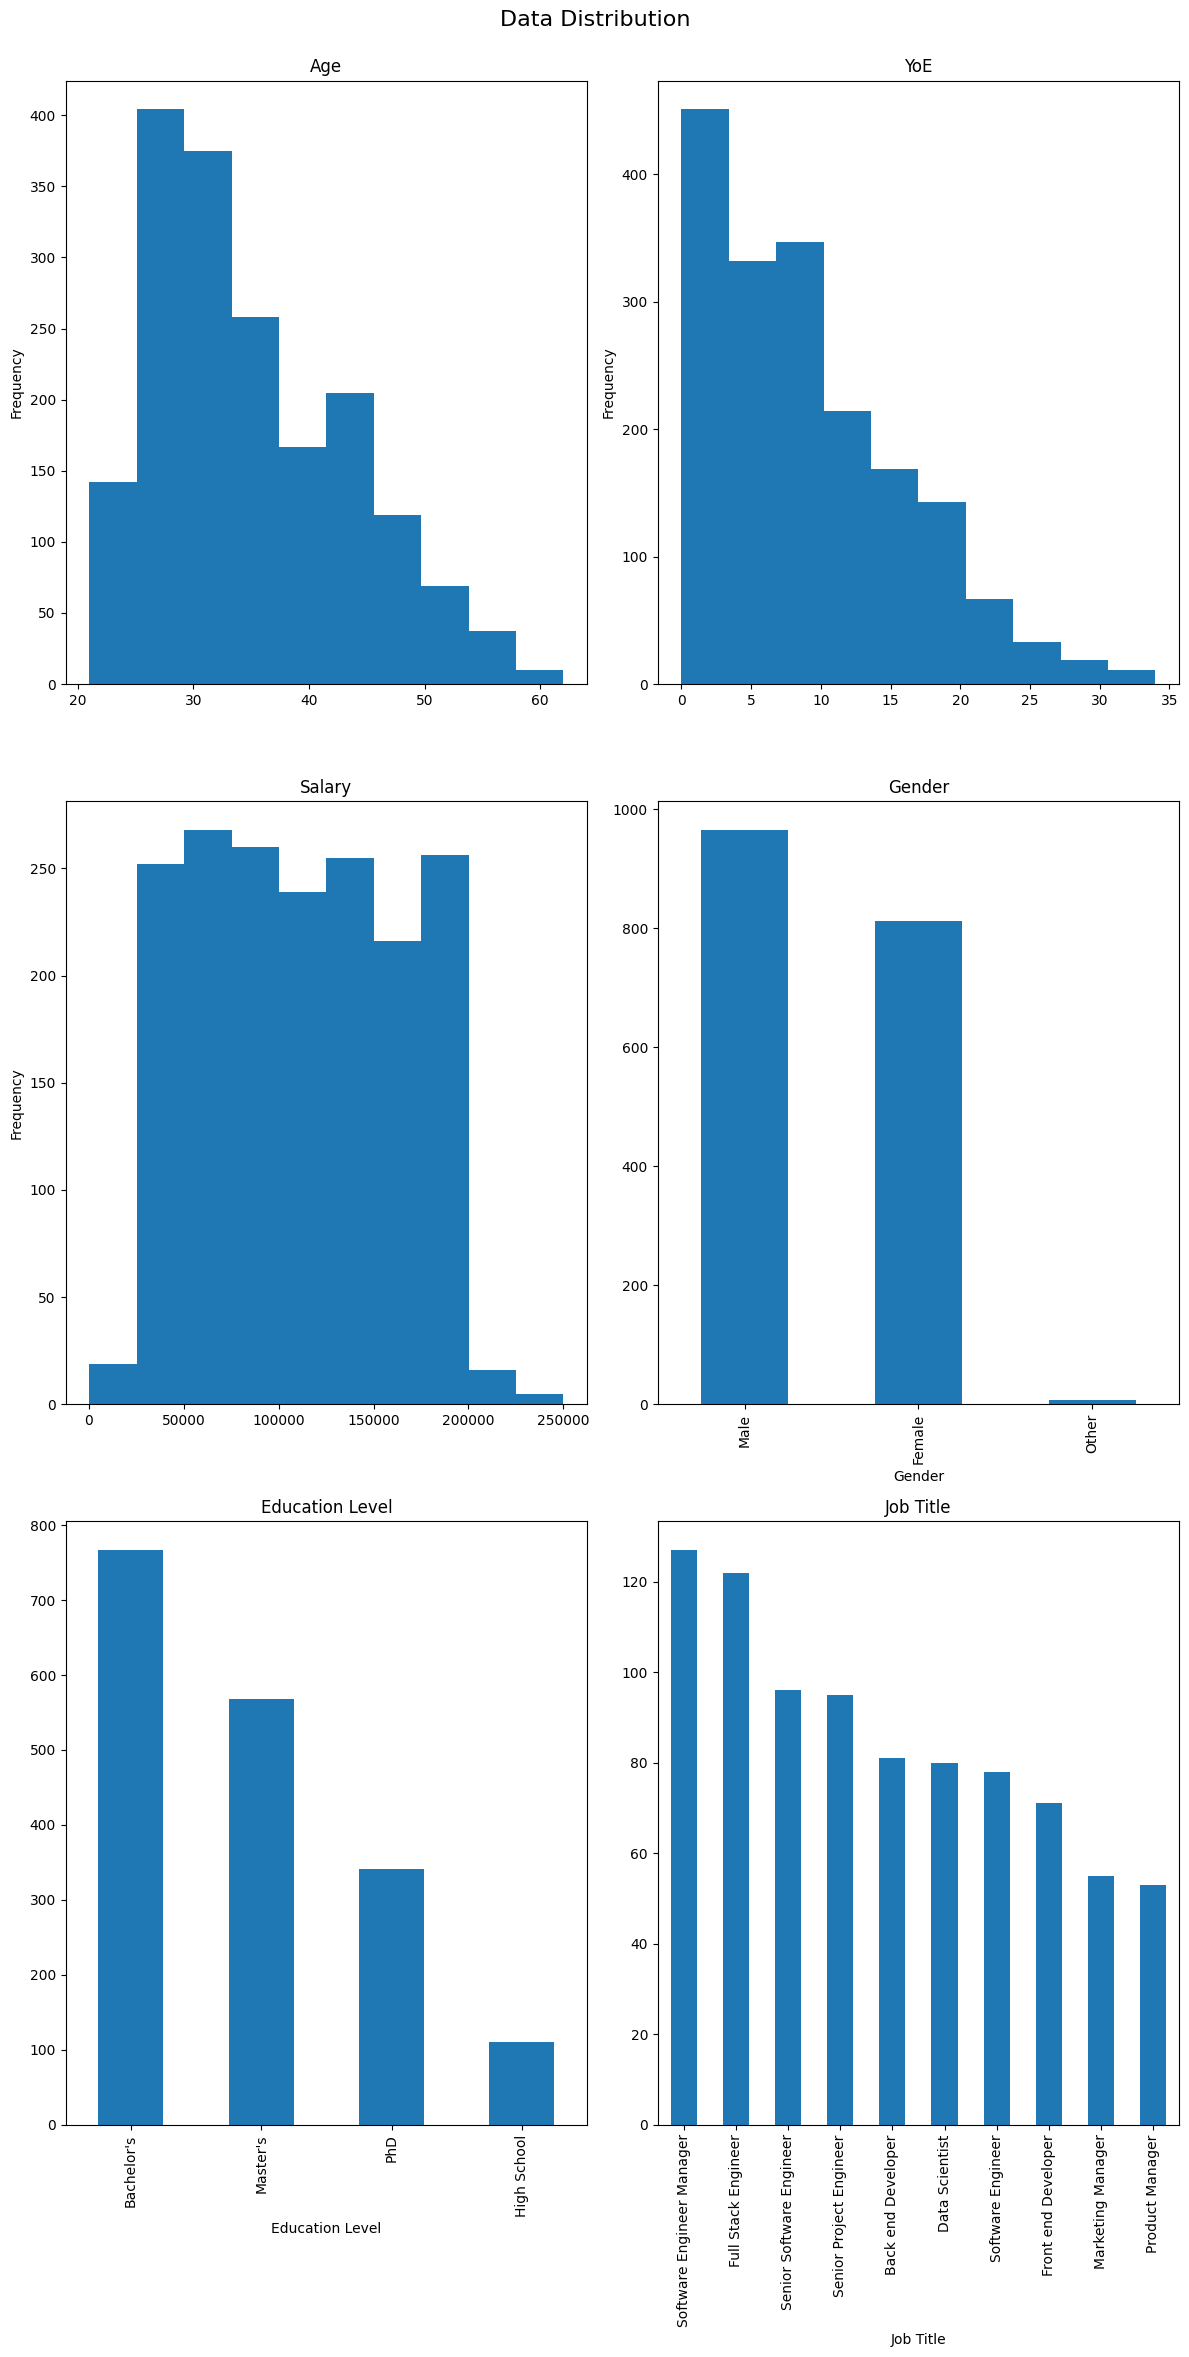

In [18]:
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(12,24))

df['Age'].plot(kind='hist', ax=axes[0,0], title='Age')
df['Years of Experience'].plot(kind='hist', ax=axes[0,1], title='YoE')
df['Salary'].plot(kind='hist', ax=axes[1,0], title='Salary')
df['Gender'].value_counts().plot(kind='bar', ax=axes[1,1], title='Gender')
df['Education Level'].value_counts().plot(kind='bar', ax=axes[2,0], title='Education Level')
df['Job Title'].value_counts()[:10].plot(kind='bar', ax=axes[2,1], title='Job Title')

fig.suptitle('Data Distribution\n\n', fontsize=16)
plt.tight_layout()

In [19]:
fig = make_subplots(rows=2, cols=2, subplot_titles=('<b>Gender','<b>Education Level','<b>Age', '<b>Years of Experience'))

fig.add_trace(go.Box(x=df['Gender'], y=df['Salary']), row=1, col=1).update_yaxes(title_text='<b>Salary'),
fig.add_trace(go.Box(x=df['Education Level'], y=df['Salary']), row=1, col=2)
fig.add_trace(go.Box(x=df['Age'], y=df['Salary']), row=2, col=1)
fig.add_trace(go.Box(x=df['Years of Experience'], y=df['Salary']), row=2, col=2)

fig.update_layout(title='<b>Data Distribution respect Salary', height=800, width=800,
                 showlegend=False,
                 title_font_size = 20)
fig.show()

In [20]:
fig = px.histogram(df, x='Age', title='Histograma de Edades')

fig.update_traces(marker_color='blue', 
                  opacity=0.7, 
                  marker_line_color='black', 
                  marker_line_width=1
                 )

fig.update_xaxes(title_text='Age') 
fig.update_yaxes(title_text='Frequency') 

fig.update_layout(
             yaxis_title = '<b>Frequency',
             xaxis_title = '<b>Age',
             title='<b>Age Frequency',
             title_font_size = 20,
                          )

fig.show()

In [21]:

fig = px.histogram(df, x='Years of Experience', 
                   title='Histograma de Edades', 
                   
  )

fig.update_traces(marker_color='blue', 
                  opacity=0.7, 
                  marker_line_color='black', 
                  marker_line_width=1
                 )

fig.update_xaxes(title_text='Age') 
fig.update_yaxes(title_text='Frequency') 

fig.update_layout(
             yaxis_title = '<b>Frequency',
             xaxis_title = '<b>Years of Experience',
             title='<b>Years of Experience Frequency',
             title_font_size = 20,
    
             )


fig.show()

In [22]:
fig = px.histogram(df, x='Salary')

fig.update_traces(marker_color='blue', 
                  opacity=0.7, 
                  marker_line_color='black', 
                  marker_line_width=1
                 )

fig.update_xaxes(title_text='Salary') 
fig.update_yaxes(title_text='Frequency') 

fig.update_layout(
             yaxis_title = '<b>Frequency',
             xaxis_title = '<b>Years of Experience',
             title='<b>Salary Frequency',
             title_font_size = 20,
    
             )


fig.show()

In [23]:

fig = px.scatter(df, x='Years of Experience', y='Salary', 
                 hover_data={'Years of Experience': True, 'Salary': True},
                 trendline='ols'
                )

fig.update_layout(
             yaxis_title = '<b>Salary',
             xaxis_title = '<b>Years of Experience',
             title='<b>Salary by YoE',
             title_font_size = 20,
             showlegend=False,
             )

fig.update_traces(
    hovertemplate='YoE: %{x}<br>' +
                  'Salary: %{y:,.0f}',
    line=dict(width=3, color='red')
)

fig.show()


In [24]:

fig = px.scatter(df, x='Years of Experience', y='Salary', 
                 hover_data={'Years of Experience': True, 'Salary': True},color='Gender',
                
                 trendline='ols'
                )

fig.update_layout(
             yaxis_title = '<b>Salary',
             xaxis_title = '<b>Years of Experience',
             title='<b>Relation btw Salary vs YoE respect Gender',
             title_font_size = 20,
             showlegend=True,
             )

fig.update_traces(
    hovertemplate='YoE: %{x}<br>' +
                  'Salary: %{y:,.0f}',
    line=dict(width=3, 
             
             )
)

fig.show()

In [25]:
fig = px.scatter(df, x='Age', y='Salary', 
                 hover_data={'Age': True, 'Salary': True},
                 trendline='ols'
                )

fig.update_layout(
             yaxis_title = '<b>Salary',
             xaxis_title = '<b>Age',
             title='<b>Salary by Age',
             title_font_size = 20,
             showlegend=False,
             geo_scope='usa'
             )

fig.update_traces(
    hovertemplate='YoE: %{x}<br>' +
                  'Salary: %{y:,.0f}',
    line=dict(width=3, color='red')
)

fig.show()

In [26]:
fig = px.scatter(df, x='Age', y='Salary', 
                 hover_data={'Age': True, 'Salary': True,'Education Level': True},
                 color ='Education Level', 
                 trendline='ols',
                
                )

fig.update_layout(
             yaxis_title = '<b>Salary',
             xaxis_title = '<b>Age',
             title='<b>Relation btw Salary vs Age respect Education Level',
             title_font_size = 20,
             showlegend=True,
             
             )

fig.update_traces(line=dict(width=3,
              
             )
)

fig.show()

In [27]:
g=df['Gender'].value_counts().reset_index()

fig = px.pie(g,values='count',
             names='Gender',
             width=600,
             height=600,
             color='Gender',
             color_discrete_map={'Male':'lightcyan',
                                 'Female':'darkblue',
                                 'Other':'royalblue'}
)
fig.update_layout(
             
             title= "<b>Gender Distribution<b>",
             title_font_size = 20,
              #showlegend=False,
)

fig.update_traces(textposition='inside', textinfo='percent+label',
                 marker=dict( line=dict(color='#000000', width=1))
                 )

fig.show()

In [28]:
Temp=df['Education Level'].value_counts().reset_index()

fig = px.pie(Temp,values='count',
             names='Education Level',
             width=700,
             height=700,
             color='Education Level',
             #color_discrete_map={'Male':'lightcyan',
              #                   'Female':'darkblue',
               #                  'Other':'royalblue'}
)
fig.update_layout(
            title= "<b>Education Level Distribution<b>",
            title_font_size = 20,
            showlegend=False,
)

fig.update_traces(textposition='inside', 
                  textinfo='percent+label',
                  textfont=dict(size=16),
                  marker=dict( line=dict(color='#000000', width=2))
                 )

fig.show()

In [29]:


Temp = df.groupby(['Education Level', 'Gender']).size().reset_index(name='Count')


fig = px.bar(Temp, x='Education Level', y='Count', color='Gender', barmode='group',
             )

fig.update_layout(
             xaxis_title = '<b>Education Level',
             yaxis_title = '<b>Gender Count',
             title= "<b>Gender Count by Education Level",
             title_font_size = 20,
             legend_title = 'Legend',
             
            )


fig.show()


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



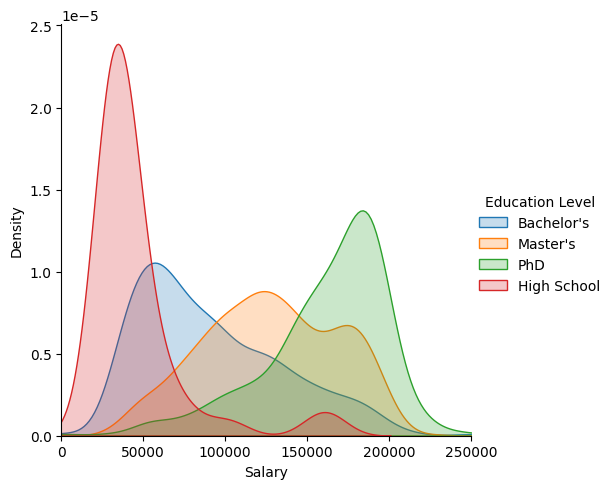

In [30]:
(sns.FacetGrid(df, hue="Education Level", height=5, xlim=(0, 250000))
.map(sns.kdeplot, "Salary", fill=True)
.add_legend()
);


In [31]:
Temp = df.groupby('Education Level')['Salary'].mean().sort_values(ascending=False).reset_index()


fig = px.bar(Temp, x='Education Level', y='Salary', color='Salary',
             )

fig.update_layout(
             xaxis_title = '<b>Education Level',
             yaxis_title = '<b>Mean Salary',
             title= "<b>Mean Salary by Education Level",
             title_font_size = 20,
             legend_title = 'Legend',
             
            )

fig.update_traces(hovertemplate='Salary: %{y:,.2f}<extra></extra>')
fig.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



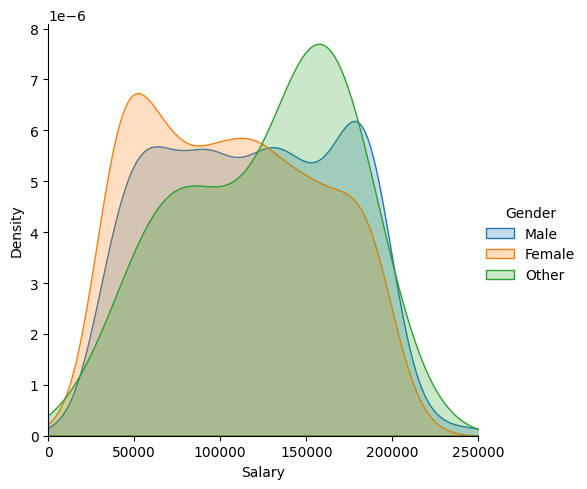

In [32]:
(sns.FacetGrid(df, hue="Gender", height=5, xlim=(0, 250000))
.map(sns.kdeplot, "Salary", fill=True)
.add_legend()
);

In [33]:
Temp = df.groupby('Gender')['Salary'].mean().sort_values(ascending=False).reset_index()


fig = px.bar(Temp, x='Gender', y='Salary', color='Salary',
             )

fig.update_layout(
             xaxis_title = '<b>Gender',
             yaxis_title = '<b>Mean Salary',
             title= "<b>Mean Salary by Gender",
             title_font_size = 20,
             legend_title = 'Legend',
             
            )

fig.update_traces(hovertemplate='Salary: %{y:,.2f}<extra></extra>')
fig.show()

In [34]:
Temp = df.groupby('Job Title')[['Salary']].max().reset_index()
Temp=Temp.sort_values(by= ['Salary'],ascending=False).head(10)

fig = px.bar(Temp, x='Job Title', y='Salary', color='Job Title',
             )

fig.update_layout(
             xaxis_title = '<b>Position',
             yaxis_title = '<b>Salary',
             title= "<b>Top 10 Salary by Job Position",
             title_font_size = 20,
             showlegend = False,
             
            )

fig.update_traces(hovertemplate=' %{y:,.0f}<extra></extra>')
fig.show()

In [35]:
Temp=df['Job Title'].value_counts().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(Temp, x='Job Title', y='count', color='Job Title',
             )

fig.update_layout(
             xaxis_title = '<b>Job Title',
             yaxis_title = '<b>Frecuency',
             title= "<b>Job Title Frequency",
             title_font_size = 20,
             showlegend = False,
             
            )

fig.update_traces(hovertemplate=' %{y:,.0f}<extra></extra>')
fig.show()

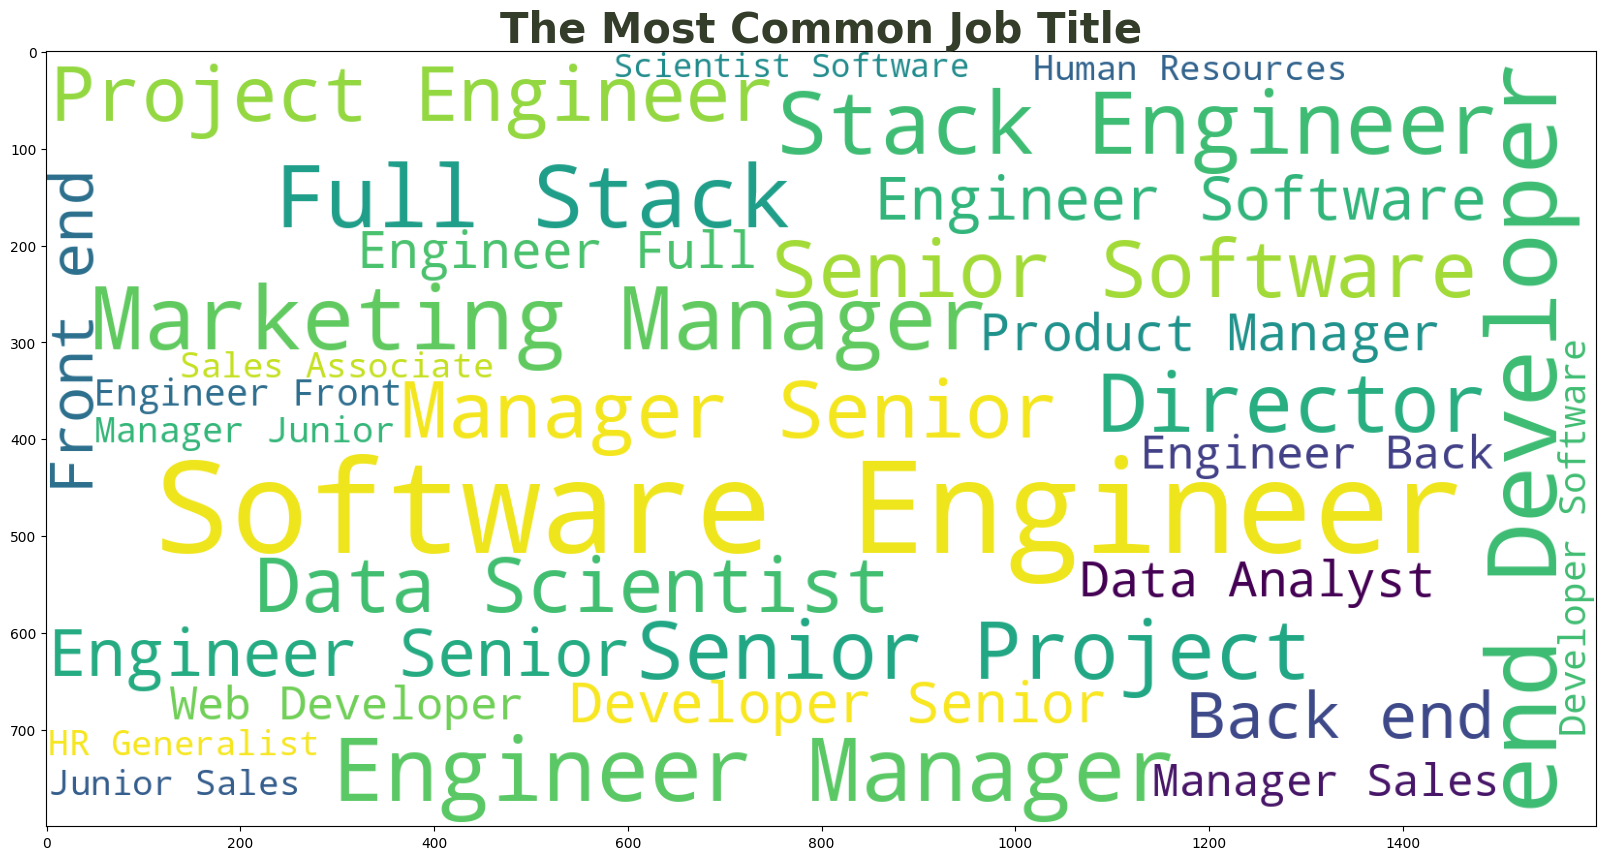

In [36]:

plt.figure(figsize=(20,20))
plt.title('The Most Common Job Title', fontsize=30, weight=600, color='#333d29')
wc = WordCloud(max_words=700, min_font_size=30,
                height=800,width=1600,background_color="white").generate(' '.join(df['Job Title']))

plt.imshow(wc)